Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 315
[LightGBM] [Info] Number of data points in the train set: 331, number of used features: 4
[LightGBM] [Info] Start training from score 28.758314
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

<ipython-input-3-b37d8b98ae37>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2 Score', y='Model', data=results_df, palette='viridis')
<ipython-input-3-b37d8b98ae37>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MSE', y='Model', data=results_df, palette='viridis')


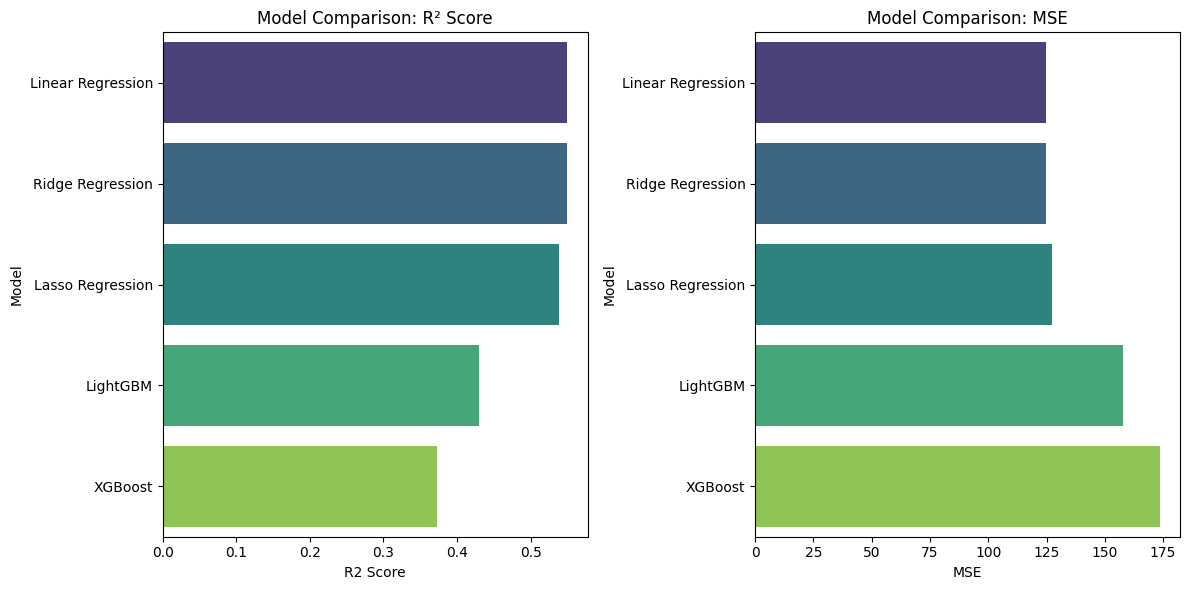

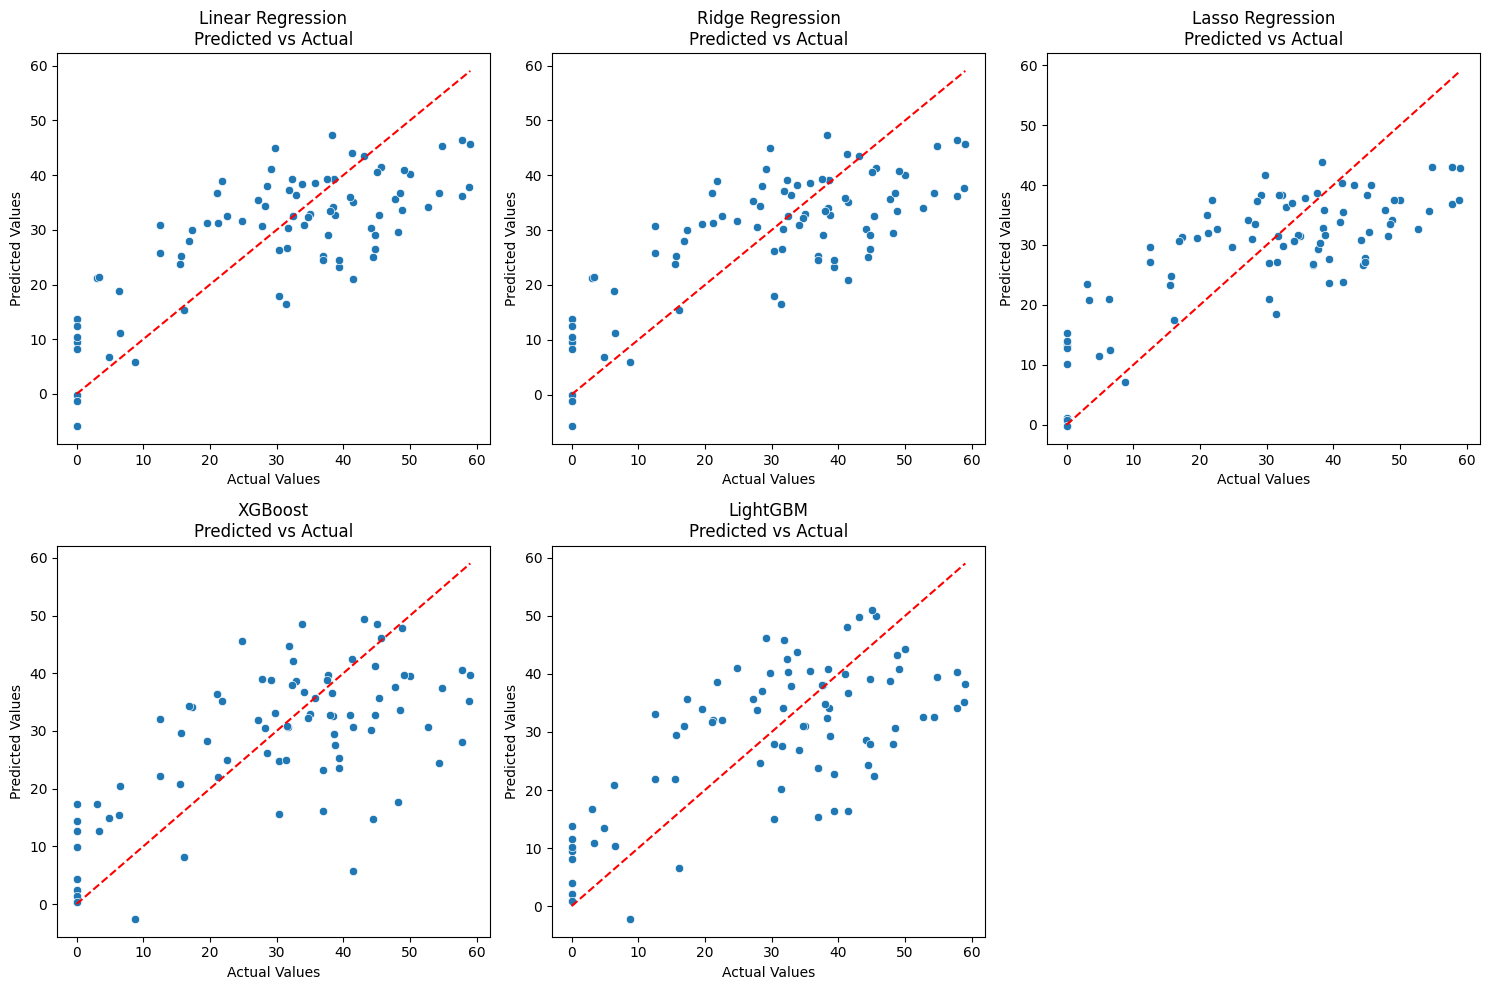

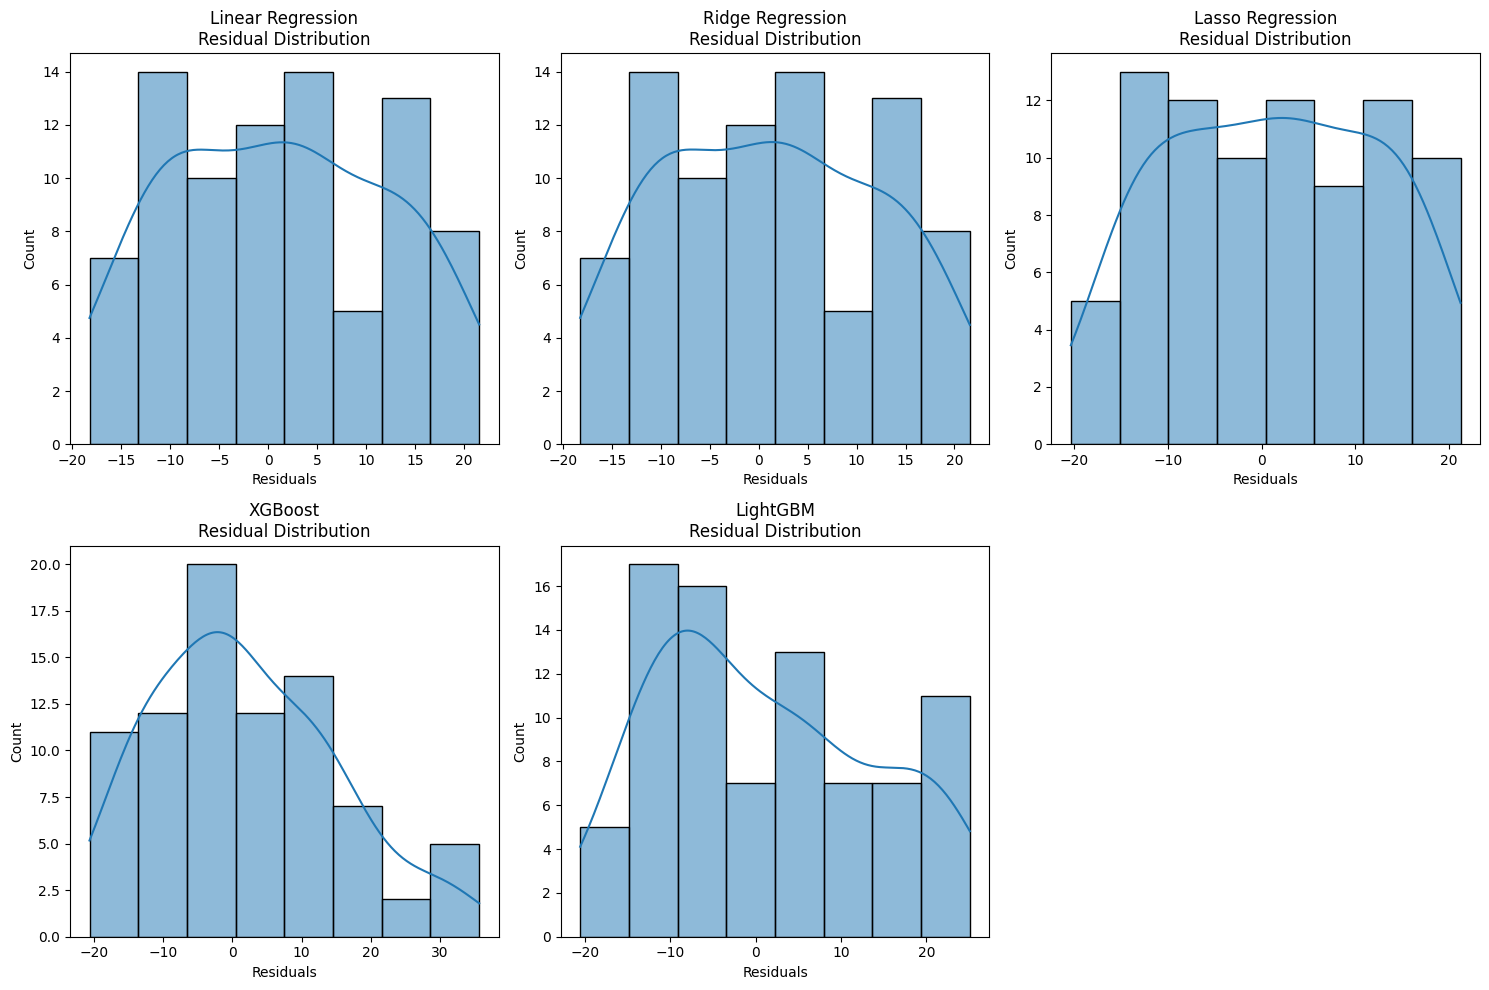

               Model  R2 Score         MSE
0  Linear Regression  0.549673  124.579392
1   Ridge Regression  0.549419  124.649747
2   Lasso Regression  0.538962  127.542632
4           LightGBM  0.429276  157.886373
3            XGBoost  0.372561  173.575927


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
import lightgbm as lgb
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Real_Estate.csv'

# Load data
data_set = pd.read_csv(file_path)


# Feature and target selection
features = ['Distance to the nearest BRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = 'House price of unit area'

X = data_set[features]
y = data_set[target].values.ravel()  # Convert to 1D array

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models with preprocessing pipelines where necessary
models = {
    'Linear Regression': Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())]),
    'Ridge Regression': Pipeline([('scaler', StandardScaler()), ('model', Ridge())]),
    'Lasso Regression': Pipeline([('scaler', StandardScaler()), ('model', Lasso())]),
    'XGBoost': XGBRegressor(random_state=42),
    'LightGBM': lgb.LGBMRegressor(random_state=42)
}

# Evaluate each model and store predictions
results = []
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results.append((name, r2, mse))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'R2 Score', 'MSE'])
results_df.sort_values(by='R2 Score', ascending=False, inplace=True)

# Plot R² and MSE comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='R2 Score', y='Model', data=results_df, palette='viridis')
plt.title('Model Comparison: R² Score')
plt.subplot(1, 2, 2)
sns.barplot(x='MSE', y='Model', data=results_df, palette='viridis')
plt.title('Model Comparison: MSE')
plt.tight_layout()
plt.show()

# Plot predicted vs actual values for all models
plt.figure(figsize=(15, 10))
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{name}\nPredicted vs Actual')
plt.tight_layout()
plt.show()

# Residual plots for all models
plt.figure(figsize=(15, 10))
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    residuals = y_test - y_pred
    plt.subplot(2, 3, i)
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.title(f'{name}\nResidual Distribution')
plt.tight_layout()
plt.show()

print(results_df)
